<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/4_Day-Weather_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set-up
import pandas as pd
pd.set_option('display.max_columns', None)

In [90]:
#combine weather and crime for each year

data= []

for year in range(2015,2020):
  weather = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/data/w_{}.csv'.format(year)).set_index('date')
  crime = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/data/c_day_{}.csv'.format(year)).set_index('date')
  crime.drop('Unnamed: 0', axis=1, inplace=True)
  data.append(crime.join(weather).reset_index())

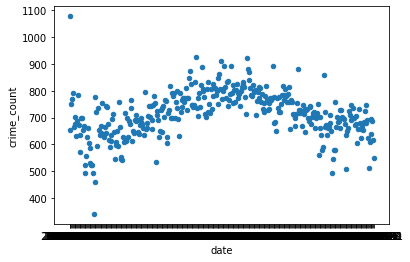

In [56]:
data[4].plot(x = 'date', y = 'crime_count', kind = 'scatter')

In [101]:
adjusted = []

for year in range(5):
  df = data[year].copy()
  upper = df.crime_count.mean() + (2 * df.crime_count.std())
  lower = df.crime_count.mean() - (2 * df.crime_count.std())

  df.drop(df[df.crime_count > upper].index, inplace=True)
  df.drop(df[df.crime_count < lower].index, inplace=True)

  adjusted.append(df)

In [107]:
adjusted[4].describe()

,day_of_week,crime_count,mo,temp,dewp,slp,stp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,303.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.0,344.000000,344.0
mean,3.976744,718.619186,6.633721,51.027713,41.728295,1016.582994,842.260271,9.108527,7.513566,14.727810,23.501815,60.944961,42.890504,0.127912,0.295640,0.037791,0.453488,0.127907,0.0,0.139535,0.0
std,1.992562,69.774086,3.398614,18.890182,18.287269,7.091877,331.722081,1.325579,3.139248,4.503120,6.339108,19.852093,18.223264,0.284122,0.961304,0.190967,0.498557,0.334473,0.0,0.347009,0.0
min,1.000000,544.000000,1.000000,2.800000,-5.866667,996.250000,1.733333,2.966667,2.066667,5.300000,14.000000,15.333333,-4.733333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,668.000000,4.000000,36.383333,28.225000,1011.862500,984.325000,8.750000,5.300000,11.700000,18.958333,44.691667,28.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.000000,720.000000,7.000000,49.633333,40.533333,1016.100000,990.100000,9.766667,7.066667,14.000000,22.000000,60.966667,42.116667,0.004167,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,6.000000,773.000000,10.000000,68.375000,57.533333,1020.825000,994.108333,10.000000,9.350000,17.341667,27.200000,78.900000,59.533333,0.105417,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0
max,7.000000,883.000000,12.000000,85.500000,77.566667,1044.700000,998.966667,10.000000,19.300000,32.933333,48.366667,95.433333,77.900000,2.903333,8.100000,1.000000,1.000000,1.000000,0.0,1.000000,0.0
